In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

In [23]:
plt.rcParams.update({
    'axes.facecolor': '#F5F6FA',
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.5,
    'axes.axisbelow': True
})


In [2]:
df = pd.read_csv("quick_commerce_data_raw.csv")

In [3]:
df.head()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.33750,19.182,11.97,12.0,Dairy,Wallet,2.1,1,3.2
1,1000002,Flipkart Minutes,Amritsar,56,1007.30000,19.644,12.74,10.0,Snacks,Cash on Delivery,2.3,0,3.2
2,1000003,Flipkart Minutes,Mumbai,18,1211.66000,16.910,4.85,NaN,Personal Care,Cash on Delivery,3.3,0,3.8
3,1000004,Swiggy Instamart,Delhi,23,1179.05925,5.864,6.44,2.0,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.02550,12.470,2.45,13.0,Household,Wallet,3.7,0,4.8


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Order_ID                 1000000 non-null  int64  
 1   Company                  1000000 non-null  str    
 2   City                     948000 non-null   str    
 3   Customer_Age             1000000 non-null  int64  
 4   Order_Value              1000000 non-null  float64
 5   Delivery_Time_Min        1000000 non-null  float64
 6   Distance_Km              1000000 non-null  float64
 7   Items_Count              965000 non-null   float64
 8   Product_Category         1000000 non-null  str    
 9   Payment_Method           1000000 non-null  str    
 10  Customer_Rating          953000 non-null   float64
 11  Discount_Applied         1000000 non-null  int64  
 12  Delivery_Partner_Rating  895863 non-null   float64
dtypes: float64(6), int64(3), str(4)
memory usage: 99.2 MB


In [5]:
df.isnull().sum()

Order_ID                        0
Company                         0
City                        52000
Customer_Age                    0
Order_Value                     0
Delivery_Time_Min               0
Distance_Km                     0
Items_Count                 35000
Product_Category                0
Payment_Method                  0
Customer_Rating             47000
Discount_Applied                0
Delivery_Partner_Rating    104137
dtype: int64

In [6]:
df.describe(include='number')

,Order_ID,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,965000.000000,953000.000000,1000000.000000,895863.000000
mean,1.500000e+06,38.470387,571.643584,16.452412,7.750231,9.998317,3.042072,0.400883,3.749257
std,2.886753e+05,12.118520,382.784520,6.257172,4.186665,5.478725,1.186872,0.490078,0.722121
min,1.000001e+06,18.000000,50.000000,5.000000,0.500000,1.000000,1.000000,0.000000,2.500000
25%,1.250001e+06,28.000000,287.840150,12.368000,4.130000,5.000000,2.000000,0.000000,3.100000
50%,1.500000e+06,38.000000,531.324600,16.342000,7.740000,10.000000,3.000000,0.000000,3.700000
75%,1.750000e+06,49.000000,796.182500,20.196000,11.380000,15.000000,4.000000,1.000000,4.400000
max,2.000000e+06,59.000000,13877.325000,40.000000,15.000000,19.000000,5.000000,1.000000,5.000000


Handling missing data

In [7]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
937195,1937196,Dunzo,Bengluru,41,212.1565,14.51,5.85,17.0,Household,Credit Card,1.1,0,3.0


In [8]:
df.isnull().sum()

Order_ID                        0
Company                         0
City                        52000
Customer_Age                    0
Order_Value                     0
Delivery_Time_Min               0
Distance_Km                     0
Items_Count                 35000
Product_Category                0
Payment_Method                  0
Customer_Rating             47000
Discount_Applied                0
Delivery_Partner_Rating    104137
dtype: int64

In [9]:
df.dropna(subset=['City'],inplace=True)

In [10]:
df.isnull().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                33228
Product_Category               0
Payment_Method                 0
Customer_Rating            44575
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

In [11]:
df['Items_Count'] = df['Items_Count'].fillna(df['Items_Count'].mode()[0])

In [12]:
df.isnull().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                    0
Product_Category               0
Payment_Method                 0
Customer_Rating            44575
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

In [13]:
df['Customer_Rating'] = df.groupby("Company")['Customer_Rating'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                    0
Product_Category               0
Payment_Method                 0
Customer_Rating                0
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

In [14]:
df['Delivery_Partner_Rating'] = df.groupby("Delivery_Time_Min")['Delivery_Partner_Rating'].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()

Order_ID                    0
Company                     0
City                        0
Customer_Age                0
Order_Value                 0
Delivery_Time_Min           0
Distance_Km                 0
Items_Count                 0
Product_Category            0
Payment_Method              0
Customer_Rating             0
Discount_Applied            0
Delivery_Partner_Rating    76
dtype: int64

In [15]:
df['Delivery_Partner_Rating'] = df['Delivery_Partner_Rating'].fillna(df['Delivery_Partner_Rating'].mode()[0])

In [16]:
df.isnull().sum()

Order_ID                   0
Company                    0
City                       0
Customer_Age               0
Order_Value                0
Delivery_Time_Min          0
Distance_Km                0
Items_Count                0
Product_Category           0
Payment_Method             0
Customer_Rating            0
Discount_Applied           0
Delivery_Partner_Rating    0
dtype: int64

In [17]:
df.info()

<class 'pandas.DataFrame'>
Index: 948000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 948000 non-null  int64  
 1   Company                  948000 non-null  str    
 2   City                     948000 non-null  str    
 3   Customer_Age             948000 non-null  int64  
 4   Order_Value              948000 non-null  float64
 5   Delivery_Time_Min        948000 non-null  float64
 6   Distance_Km              948000 non-null  float64
 7   Items_Count              948000 non-null  float64
 8   Product_Category         948000 non-null  str    
 9   Payment_Method           948000 non-null  str    
 10  Customer_Rating          948000 non-null  float64
 11  Discount_Applied         948000 non-null  int64  
 12  Delivery_Partner_Rating  948000 non-null  float64
dtypes: float64(6), int64(3), str(4)
memory usage: 101.3 MB


Checking Outliers

In [18]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
623245,1623246,Flipkart Minutes,Delhi,40,50.0,6.972,6.62,14.0,Snacks,Debit Card,3.6,0,3.8


In [19]:
df['Order_ID'] = df['Order_ID'].astype(str)
df.info()

<class 'pandas.DataFrame'>
Index: 948000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 948000 non-null  str    
 1   Company                  948000 non-null  str    
 2   City                     948000 non-null  str    
 3   Customer_Age             948000 non-null  int64  
 4   Order_Value              948000 non-null  float64
 5   Delivery_Time_Min        948000 non-null  float64
 6   Distance_Km              948000 non-null  float64
 7   Items_Count              948000 non-null  float64
 8   Product_Category         948000 non-null  str    
 9   Payment_Method           948000 non-null  str    
 10  Customer_Rating          948000 non-null  float64
 11  Discount_Applied         948000 non-null  int64  
 12  Delivery_Partner_Rating  948000 non-null  float64
dtypes: float64(6), int64(2), str(5)
memory usage: 101.3 MB


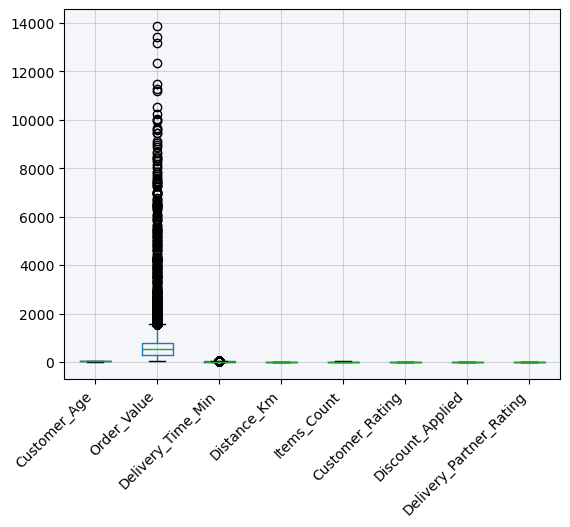

In [24]:
df.boxplot()
plt.xticks(rotation = 45,ha="right")
plt.show()

In [25]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
868809,1868810,Blinkit,Hyderabad,35,150.876,19.91,14.85,18.0,Snacks,Debit Card,4.1,0,3.5


In [28]:
# Replace '__' with column name
column = 'Order_Value'

# Calculate Q1 and Q3
q1 = df[column].quantile(0.25)
q3 = df[column].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filter dataframe to remove outliers
df = df[(df[column] >= lower) & (df[column] <= upper)]

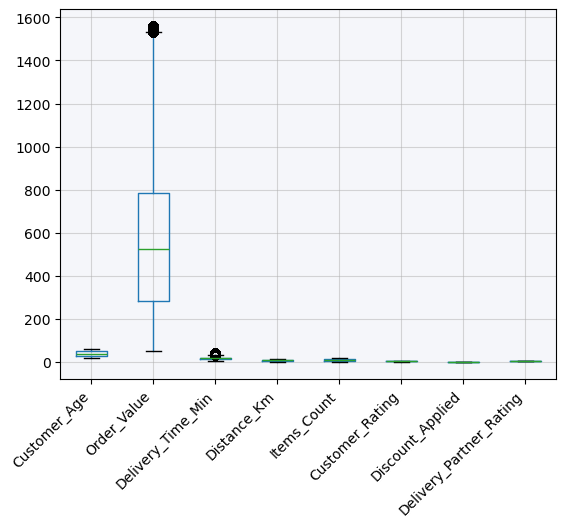

In [30]:
df.boxplot()
plt.xticks(rotation = 45,ha="right")
plt.show()

Data & Data type handling

In [36]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
519901,1519902,Dunzo,Haridwar,20,378.921,23.256,3.76,1,Fruits & Vegetables,Debit Card,2.0,0,2.9


In [33]:
df.info()

<class 'pandas.DataFrame'>
Index: 934608 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 934608 non-null  str    
 1   Company                  934608 non-null  str    
 2   City                     934608 non-null  str    
 3   Customer_Age             934608 non-null  int64  
 4   Order_Value              934608 non-null  float64
 5   Delivery_Time_Min        934608 non-null  float64
 6   Distance_Km              934608 non-null  float64
 7   Items_Count              934608 non-null  float64
 8   Product_Category         934608 non-null  str    
 9   Payment_Method           934608 non-null  str    
 10  Customer_Rating          934608 non-null  float64
 11  Discount_Applied         934608 non-null  int64  
 12  Delivery_Partner_Rating  934608 non-null  float64
dtypes: float64(6), int64(2), str(5)
memory usage: 99.8 MB


In [34]:
df['Items_Count'] = df['Items_Count'].astype(int)
df.info()

<class 'pandas.DataFrame'>
Index: 934608 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 934608 non-null  str    
 1   Company                  934608 non-null  str    
 2   City                     934608 non-null  str    
 3   Customer_Age             934608 non-null  int64  
 4   Order_Value              934608 non-null  float64
 5   Delivery_Time_Min        934608 non-null  float64
 6   Distance_Km              934608 non-null  float64
 7   Items_Count              934608 non-null  int64  
 8   Product_Category         934608 non-null  str    
 9   Payment_Method           934608 non-null  str    
 10  Customer_Rating          934608 non-null  float64
 11  Discount_Applied         934608 non-null  int64  
 12  Delivery_Partner_Rating  934608 non-null  float64
dtypes: float64(5), int64(3), str(5)
memory usage: 99.8 MB


In [37]:
df['Order_Value'] = np.round(df['Order_Value'],2)
df['Delivery_Time_Min'] = np.round(df['Delivery_Time_Min'],2)
df['Distance_Km'] = np.round(df['Distance_Km'],2)
df['Customer_Rating'] = np.round(df['Customer_Rating'],2)
df['Order_Value'] = np.round(df['Order_Value'],2)
df['Delivery_Partner_Rating'] = np.round(df['Delivery_Partner_Rating'],2)

In [38]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
615025,1615026,Swiggy Instamart,Pune,37,1178.05,17.56,10.94,17,Dairy,Credit Card,4.7,1,2.8


In [39]:
df.to_csv("q_commerce_cleaned.csv",index=False)

In [40]:
df = pd.read_csv("q_commerce_cleaned.csv")

In [41]:
df.head()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.34,19.18,11.97,12,Dairy,Wallet,2.1,1,3.2
1,1000002,Flipkart Minutes,Amritsar,56,1007.30,19.64,12.74,10,Snacks,Cash on Delivery,2.3,0,3.2
2,1000003,Flipkart Minutes,Mumbai,18,1211.66,16.91,4.85,19,Personal Care,Cash on Delivery,3.3,0,3.8
3,1000004,Swiggy Instamart,Delhi,23,1179.06,5.86,6.44,2,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.03,12.47,2.45,13,Household,Wallet,3.7,0,4.8


Business Questions

Companies having the highest total revenue

In [52]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
41392,1044190,Zepto,Hyderabad,36,561.24,8.4,7.34,12,Household,Credit Card,2.0,0,4.4


In [53]:
df_company_revenue = df.groupby("Company")["Order_Value"].sum().sort_values(ascending=False).reset_index(name="Revenue").copy()
df_company_revenue

,Company,Revenue
0,Swiggy Instamart,70322474.44
1,Blinkit,68269157.57
2,Zepto,66899355.27
3,Big Basket,65142203.66
4,Flipkart Minutes,64707806.48
5,Amazon Now,63714341.11
6,Dunzo,62421195.49
7,Jio Mart,56558608.61


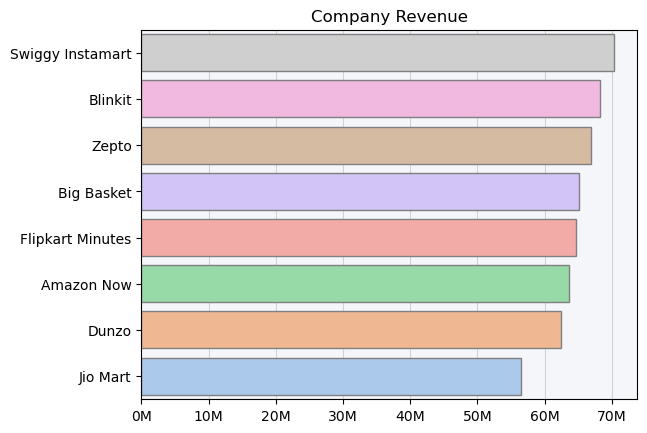

In [54]:
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_company_revenue,
    x='Revenue',
    y='Company',
    hue='Revenue',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000000:.0f}M")
)

plt.title('Company Revenue')
plt.xlabel('')
plt.ylabel('')
plt.show()

Companies having the highest average order value

In [55]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
90467,1096635,Zepto,Pune,54,519.97,6.34,3.9,4,Personal Care,Debit Card,2.9,0,3.0


In [56]:
df_company_aov = df.groupby("Company")["Order_Value"].mean().sort_values(ascending=False).reset_index(name="Average_Order_Value").copy()
df_company_aov

,Company,Average_Order_Value
0,Swiggy Instamart,611.164966
1,Blinkit,586.101971
2,Zepto,573.775507
3,Big Basket,559.261357
4,Flipkart Minutes,549.993255
5,Amazon Now,545.238080
6,Dunzo,531.040840
7,Jio Mart,479.562216


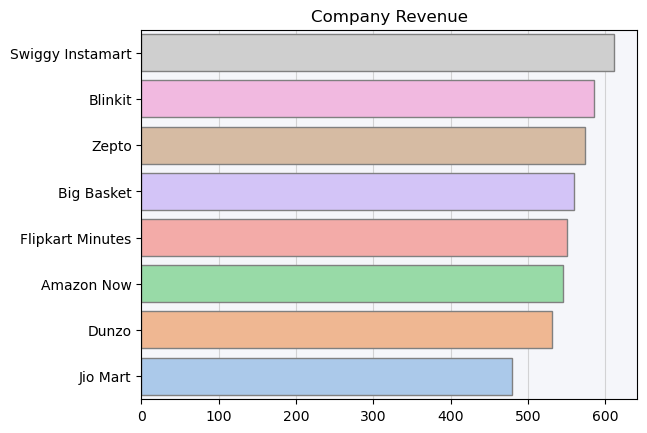

In [ ]:
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_company_aov,
    x='Average_Order_Value',
    y='Company',
    hue='Average_Order_Value',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x:.0f}")
)

plt.title('Company Average Order Value')
plt.xlabel('')
plt.ylabel('')
plt.show()

Customer Rating Variation Amcross Company

In [63]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
372093,1398066,Blinkit,Mumbai,46,182.65,21.77,14.62,19,Dairy,Wallet,5.0,0,3.4


In [65]:
df_rating = df.groupby("Company")["Customer_Rating"].mean().sort_values(ascending=False).reset_index(name="Average_Rating").copy()
df_rating

,Company,Average_Rating
0,Blinkit,3.557073
1,Swiggy Instamart,3.284016
2,Zepto,3.202485
3,Big Basket,3.100918
4,Flipkart Minutes,3.015246
5,Amazon Now,2.907067
6,Jio Mart,2.816387
7,Dunzo,2.456513


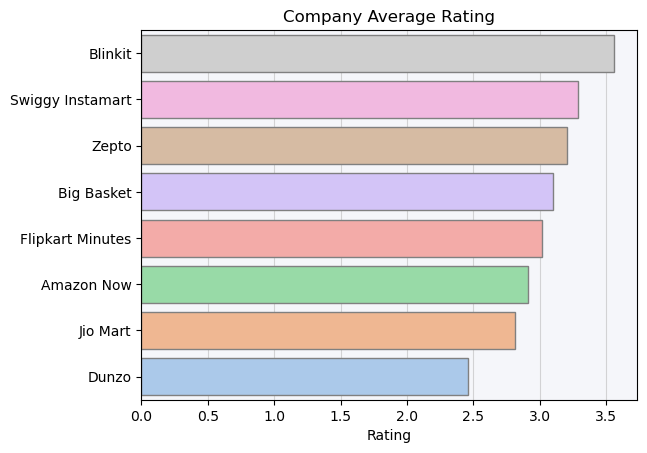

In [71]:
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_rating,
    x='Average_Rating',
    y='Company',
    hue='Average_Rating',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x}")
)

plt.title('Company Average Rating')
plt.xlabel('Rating')
plt.ylabel('')
plt.show()

In [89]:
order = df.groupby("Company")["Customer_Rating"].mean().sort_values(ascending=False).index

C:\Users\wizzi\AppData\Local\Temp\ipykernel_17252\3088318724.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


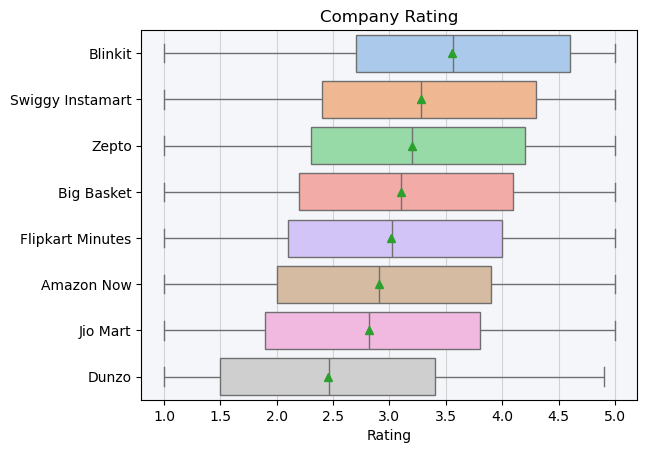

In [91]:
sns.boxplot(
    data=df,
    x='Customer_Rating',
    y='Company',
    palette='pastel',
    showmeans=True,
    order=order 
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x}")
)

plt.title('Company Rating')
plt.xlabel('Rating')
plt.ylabel('')
plt.show()

Delivary Time vs Delivary Partner Rating

In [95]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
214641,1229500,Blinkit,Hyderabad,41,387.13,12.21,7.02,13,Fruits & Vegetables,Debit Card,4.3,0,3.7


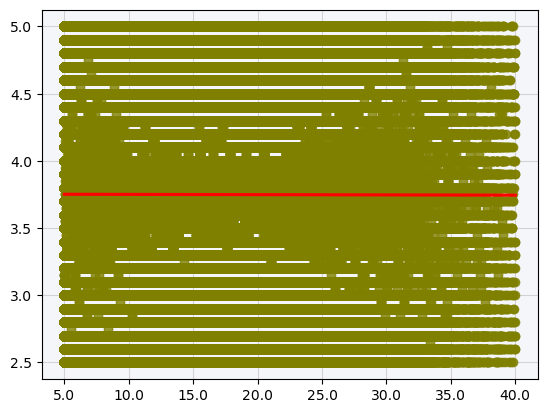

In [105]:
# Plot with pastel palette and 1px edge
sns.regplot(
    data=df,
    x='Delivery_Time_Min',
    y='Delivery_Partner_Rating',
    color='olive',
    line_kws={'color': 'red'}
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x}")
)

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

What is the most popular product category on Swiggy Instamart, for people between 30-40 years olds, in Mumbai.

In [113]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
750296,1802897,Swiggy Instamart,Pune,48,1077.57,16.93,11.55,18,Dairy,UPI,3.8,0,2.7


In [117]:
df[(df["Company"]=="Swiggy Instamart") & (df["City"]=="Mumbai") & (df["Customer_Age"]>=30) & (df["Customer_Age"]<=40) ]["Product_Category"].value_counts()

Product_Category
Dairy                  393
Groceries              375
Household              368
Snacks                 366
Fruits & Vegetables    365
Personal Care          332
Beverages              321
Name: count, dtype: int64

Which Cities should these companies expand into based on performance?

In [118]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
108773,1116243,Dunzo,Bengluru,20,626.78,18.71,14.51,5,Groceries,Wallet,3.9,1,3.1


In [127]:
df_city_performance = df.groupby(["Company","City"])[["Order_Value","Items_Count"]].sum().reset_index()
df_city_performance

,Company,City,Order_Value,Items_Count
0,Amazon Now,Amritsar,5332814.96,101527
1,Amazon Now,Bengluru,5428504.49,100432
2,Amazon Now,Chennai,5240343.53,100002
3,Amazon Now,Delhi,5667510.72,101127
4,Amazon Now,Gurgaon,6294644.65,98910
...,...,...,...,...
91,Zepto,Jaipur,4501337.45,99213
92,Zepto,Kolkata,5539601.57,100303
93,Zepto,Mumbai,5748342.50,99164
94,Zepto,Noida,6570701.93,101145


In [132]:
df_city_performance = df_city_performance.sort_values(["Company","Order_Value"],ascending=[True,False]).reset_index()
df_city_performance

,level_0,index,Company,City,Order_Value,Items_Count
0,0,4,Amazon Now,Gurgaon,6294644.65,98910
1,1,10,Amazon Now,Noida,6244816.47,99283
2,2,3,Amazon Now,Delhi,5667510.72,101127
3,3,9,Amazon Now,Mumbai,5520865.46,99653
4,4,1,Amazon Now,Bengluru,5428504.49,100432
...,...,...,...,...,...,...
91,91,86,Zepto,Chennai,5493507.35,100247
92,92,95,Zepto,Pune,5492899.59,99681
93,93,84,Zepto,Amritsar,5456718.10,98281
94,94,91,Zepto,Jaipur,4501337.45,99213


In [137]:
df_top_cities_to_expend = df_city_performance.groupby("Company").head(3)
df_top_cities_to_expend

,level_0,index,Company,City,Order_Value,Items_Count
0,0,4,Amazon Now,Gurgaon,6294644.65,98910
1,1,10,Amazon Now,Noida,6244816.47,99283
2,2,3,Amazon Now,Delhi,5667510.72,101127
12,12,16,Big Basket,Gurgaon,6400461.77,99490
13,13,22,Big Basket,Noida,6285921.45,98687
14,14,21,Big Basket,Mumbai,5649908.60,101433
24,24,28,Blinkit,Gurgaon,6724495.22,99516
25,25,34,Blinkit,Noida,6483192.52,98268
26,26,27,Blinkit,Delhi,5950803.52,99622
36,36,40,Dunzo,Gurgaon,6194943.11,98074


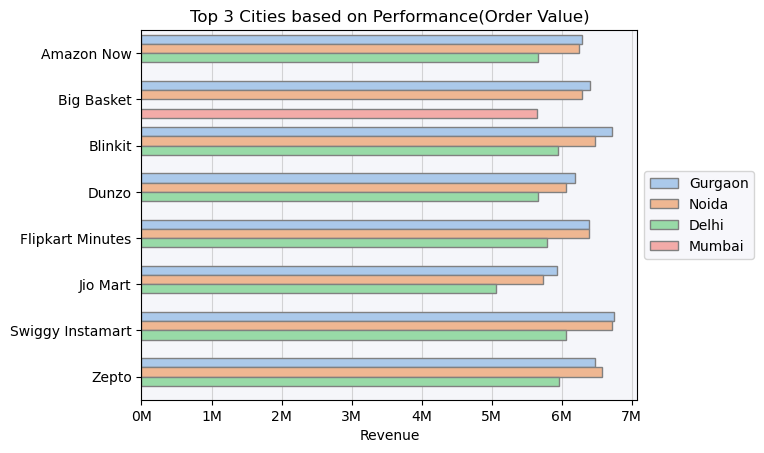

In [151]:
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_top_cities_to_expend,
    x='Order_Value',
    y='Company',
    hue='City',
    palette='pastel',
    legend=True,
    edgecolor='gray',
    linewidth=1
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000000:.0f}M")
)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.title('Top 3 Cities based on Performance(Order Value)')
plt.xlabel('Revenue')
plt.ylabel('')
plt.show()

Are discounts increasing order volume or just decreasing revenue.

In [152]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
484815,1518759,Big Basket,Delhi,42,563.97,5.19,5.31,2,Beverages,Cash on Delivery,2.6,1,3.4


In [156]:
df_discount_item_count = df.groupby("Discount_Applied")["Items_Count"].sum().reset_index(name="Total_Items")
df_discount_item_count

,Discount_Applied,Total_Items
0,0,5851776
1,1,3787543


In [159]:
df_discount_revenue = df.groupby("Discount_Applied")["Order_Value"].mean().reset_index(name="Average_Revenue")
df_discount_revenue

,Discount_Applied,Average_Revenue
0,0,475.890673
1,1,675.548152


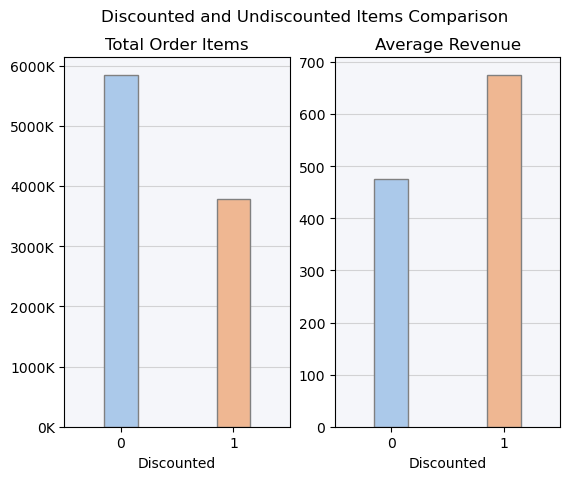

In [174]:
# Plot with pastel palette and 1px edge
plt.subplot(1,2,1)
sns.barplot(
    data=df_discount_item_count,
    x='Discount_Applied',
    y='Total_Items',
    hue='Discount_Applied',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1,
    width=0.3
)

ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)

plt.title('Total Order Items')
plt.xlabel('Discounted')
plt.ylabel('')


plt.subplot(1,2,2)
# Plot with pastel palette and 1px edge
sns.barplot(
    data=df_discount_revenue,
    x='Discount_Applied',
    y='Average_Revenue',
    hue='Discount_Applied',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1,
    width=0.3
)


plt.title('Average Revenue')
plt.xlabel('Discounted')
plt.ylabel('')

plt.suptitle("Discounted and Undiscounted Items Comparison")

plt.tight_layout
plt.show()

Which Company has the best operational efficiency? (Delivery Time vs Order Volume)

In [175]:
df.head()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.34,19.18,11.97,12,Dairy,Wallet,2.1,1,3.2
1,1000002,Flipkart Minutes,Amritsar,56,1007.30,19.64,12.74,10,Snacks,Cash on Delivery,2.3,0,3.2
2,1000003,Flipkart Minutes,Mumbai,18,1211.66,16.91,4.85,19,Personal Care,Cash on Delivery,3.3,0,3.8
3,1000004,Swiggy Instamart,Delhi,23,1179.06,5.86,6.44,2,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.03,12.47,2.45,13,Household,Wallet,3.7,0,4.8


In [178]:
df_company_efficiency = df.groupby("Company").agg(
    Total_Order=("Order_ID","count"),
    Average_Deli_Time=("Delivery_Time_Min","mean")
).reset_index()
df_company_efficiency

,Company,Total_Order,Average_Deli_Time
0,Amazon Now,116856,18.992080
1,Big Basket,116479,18.037854
2,Blinkit,116480,15.134487
3,Dunzo,117545,14.179846
4,Flipkart Minutes,117652,17.046649
5,Jio Mart,117938,23.011226
6,Swiggy Instamart,115063,16.091942
7,Zepto,116595,9.658991


In [179]:
df_company_efficiency['Efficiency'] = df_company_efficiency['Total_Order']/df_company_efficiency['Average_Deli_Time']
df_company_efficiency

,Company,Total_Order,Average_Deli_Time,Efficiency
0,Amazon Now,116856,18.992080,6152.880515
1,Big Basket,116479,18.037854,6457.475411
2,Blinkit,116480,15.134487,7696.329694
3,Dunzo,117545,14.179846,8289.582012
4,Flipkart Minutes,117652,17.046649,6901.767056
5,Jio Mart,117938,23.011226,5125.237478
6,Swiggy Instamart,115063,16.091942,7150.348923
7,Zepto,116595,9.658991,12071.136898


In [182]:
df_company_efficiency.sort_values("Efficiency",ascending=False).head(1)

,Company,Total_Order,Average_Deli_Time,Efficiency
7,Zepto,116595,9.658991,12071.136898


KPI

In [183]:
df.sample()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
657143,1703232,Jio Mart,Delhi,38,335.64,12.29,10.49,5,Snacks,Cash on Delivery,3.1,0,4.2


In [ ]:
df['Customer_Rating'].max()

np.float64(5.0)

In [213]:
total_order = df['Order_ID'].count()
total_revenue = df['Order_Value'].sum()
avg_time = df['Delivery_Time_Min'].mean()
avg_rating = df['Customer_Rating'].mean()

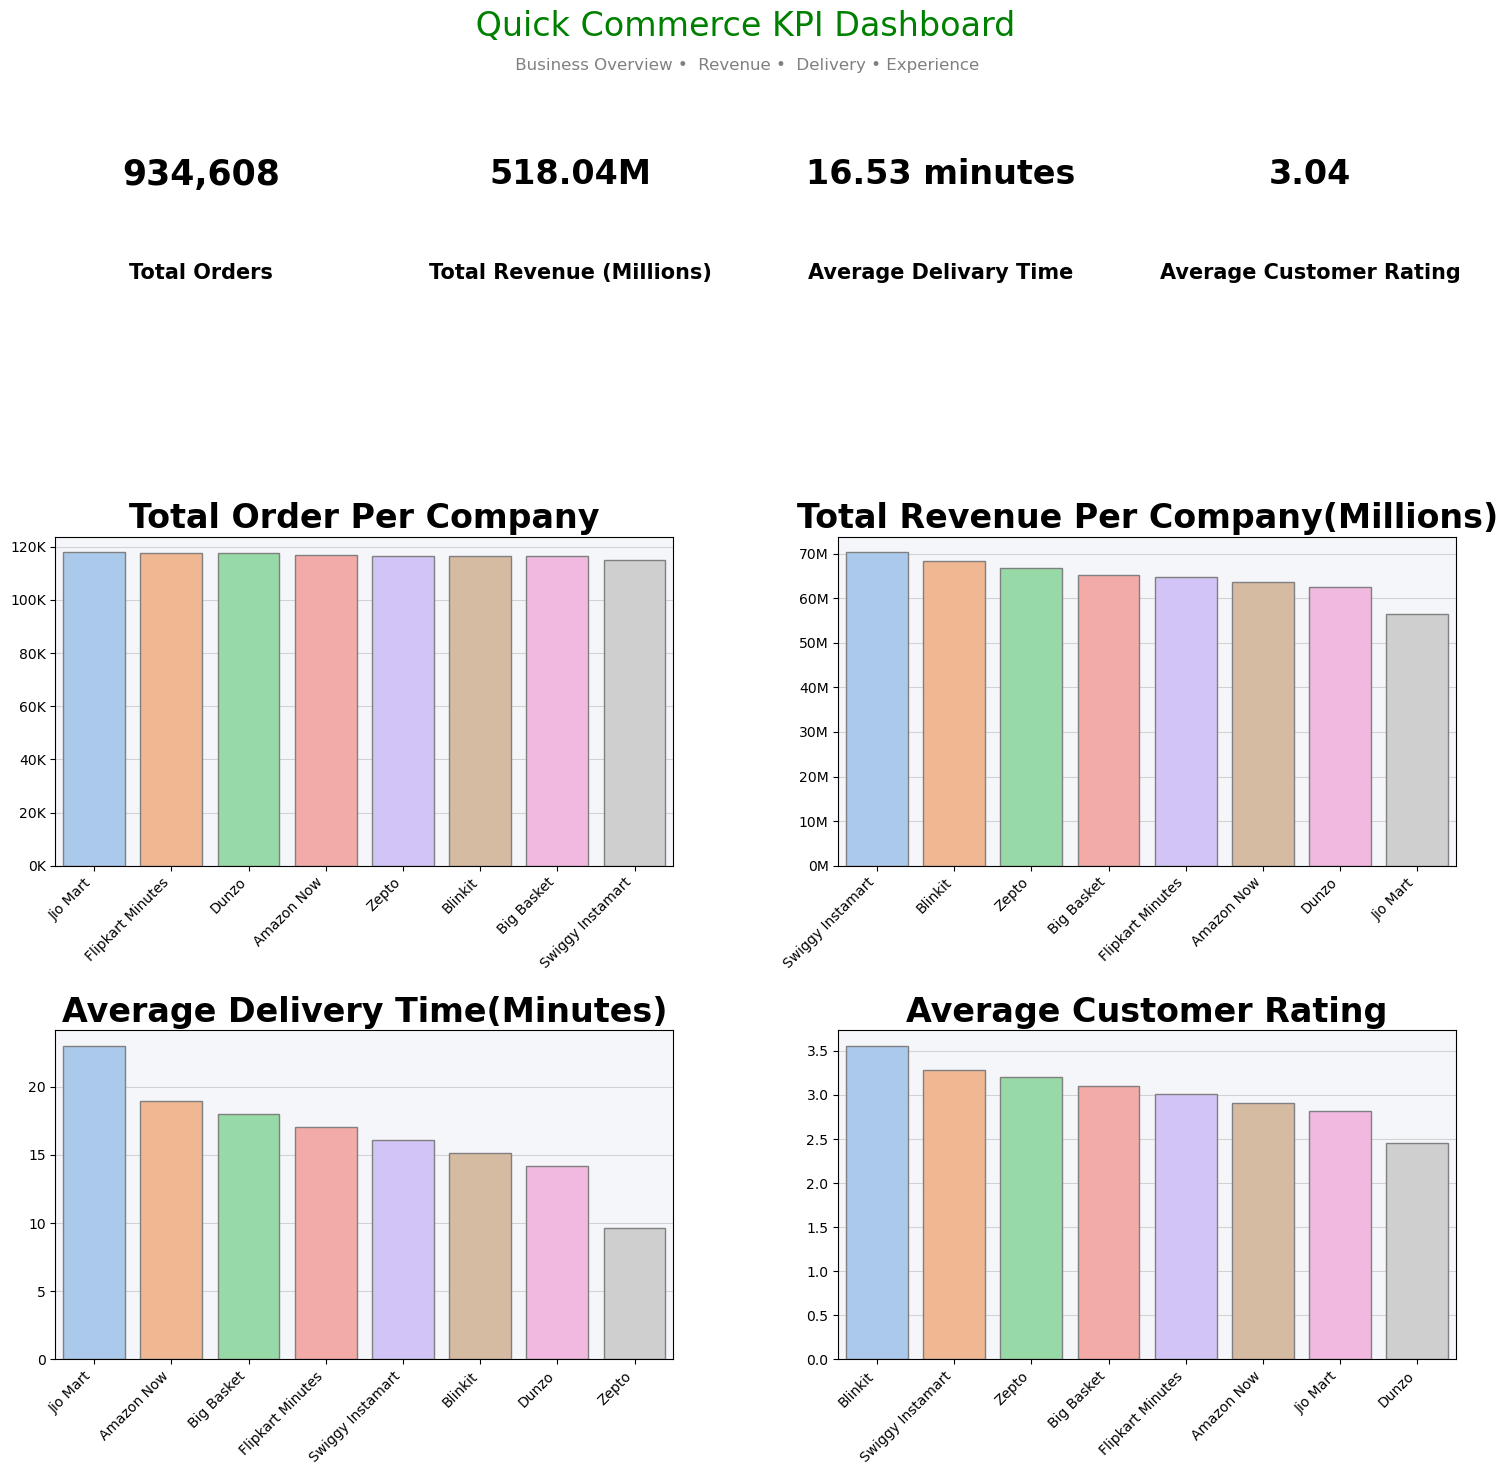

In [270]:
plt.figure(figsize=(15,15))

#----------------
# KPI
#----------------

plt.subplot2grid((3,4), (0,0))
plt.text(0.5, 0.6, f"{total_order:,}", ha='center', va='center', fontsize=25, fontweight='bold')
plt.text(0.5, 0.3,"Total Orders", ha='center', va='center', fontsize=15, fontweight='bold')
plt.axis('off')

plt.subplot2grid((3,4), (0,1))
plt.text(0.5, 0.6, f"{total_revenue/1000000:.2f}M", ha='center', va='center', fontsize=24, fontweight='bold')
plt.text(0.5, 0.3,"Total Revenue (Millions)", ha='center', va='center', fontsize=15, fontweight='bold')
plt.axis('off')

plt.subplot2grid((3,4), (0,2))
plt.text(0.5, 0.6, f"{avg_time:.2f} minutes", ha='center', va='center', fontsize=24, fontweight='bold')
plt.text(0.5, 0.3,"Average Delivary Time", ha='center', va='center', fontsize=15, fontweight='bold')
plt.axis('off')

plt.subplot2grid((3,4), (0,3))
plt.text(0.5, 0.6, f"{avg_rating:.2f}", ha='center', va='center', fontsize=24, fontweight='bold')
plt.text(0.5, 0.3,"Average Customer Rating", ha='center', va='center', fontsize=15, fontweight='bold')
plt.axis('off')

#----------------
# Company Metrics
#----------------

df_company_metrics =  df.groupby('Company').agg(Total_Orders = ('Order_ID', 'count'),
                                             Total_Revenue = ("Order_Value", 'sum'),
                                             Avg_Delivery_Time = ("Delivery_Time_Min", 'mean'),
                                             Avg_Rating = ("Customer_Rating", 'mean')).reset_index()


# Plot with pastel palette and 1px edge
plt.subplot2grid((3,2),(1,0))
sns.barplot(
    data=df_company_metrics.sort_values(by="Total_Orders",ascending=False),
    x='Company',
    y='Total_Orders',
    hue='Company',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000:.0f}K")
)
plt.xticks(rotation=45,ha="right")
plt.title('Total Order Per Company', fontsize=24, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((3,2),(1,1))
sns.barplot(
    data=df_company_metrics.sort_values(by="Total_Revenue",ascending=False),
    x='Company',
    y='Total_Revenue',
    hue='Company',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x/1000000:.0f}M")
)
plt.xticks(rotation=45,ha="right")
plt.title('Total Revenue Per Company(Millions)', fontsize=24, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((3,2),(2,0))
sns.barplot(
    data=df_company_metrics.sort_values(by="Avg_Delivery_Time",ascending=False),
    x='Company',
    y='Avg_Delivery_Time',
    hue='Company',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)
ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{x:.0f}")
)
plt.xticks(rotation=45,ha="right")
plt.title('Average Delivery Time(Minutes)', fontsize=24, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

plt.subplot2grid((3,2),(2,1))
sns.barplot(
    data=df_company_metrics.sort_values(by="Avg_Rating",ascending=False),
    x='Company',
    y='Avg_Rating',
    hue='Company',
    palette='pastel',
    legend=False,
    edgecolor='gray',
    linewidth=1
)
plt.xticks(rotation=45,ha="right")
plt.title('Average Customer Rating', fontsize=24, fontweight='bold')
plt.xlabel('')
plt.ylabel('')


#----------------
# Dashboard Title
#----------------

plt.suptitle(" Quick Commerce KPI Dashboard ", fontsize = 24, color = 'g' )

plt.figtext(0.5, 0.94, " Business Overview •  Revenue •  Delivery • Experience", ha = 'center',
           fontsize = 12, color = 'gray')


plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [232]:
df_company_metrics =  df.groupby('Company').agg(Total_Orders = ('Order_ID', 'count'),
                                             Total_Revenue = ("Order_Value", 'sum'),
                                             Avg_Delivery_Time = ("Delivery_Time_Min", 'mean'),
                                             Avg_Rating = ("Customer_Rating", 'mean')).reset_index()
df_company_metrics

,Company,Total_Orders,Total_Revenue,Avg_Delivery_Time,Avg_Rating
0,Amazon Now,116856,63714341.11,18.992080,2.907067
1,Big Basket,116479,65142203.66,18.037854,3.100918
2,Blinkit,116480,68269157.57,15.134487,3.557073
3,Dunzo,117545,62421195.49,14.179846,2.456513
4,Flipkart Minutes,117652,64707806.48,17.046649,3.015246
5,Jio Mart,117938,56558608.61,23.011226,2.816387
6,Swiggy Instamart,115063,70322474.44,16.091942,3.284016
7,Zepto,116595,66899355.27,9.658991,3.202485
